# Stochastic Gradient Descent

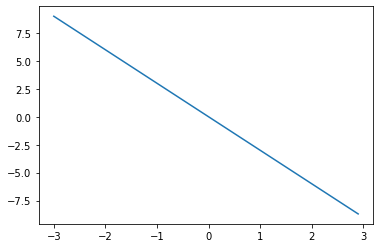

In [1]:
import torch

w = torch.tensor(-15.0, requires_grad=True)
b = torch.tensor(-10.0, requires_grad=True)

x = torch.arange(-3, 3, 0.1).view(-1, 1)

f = -3 * x

import matplotlib.pyplot as plt

plt.plot(x.numpy(), f.numpy())
plt.show()


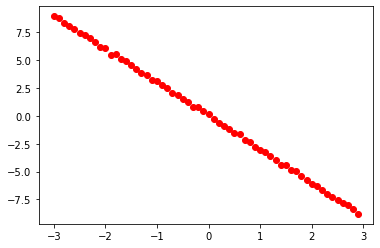

In [2]:
y = f + 0.1 * torch.randn(x.size())
plt.plot(x.numpy(), y.numpy(), 'ro')
plt.show()

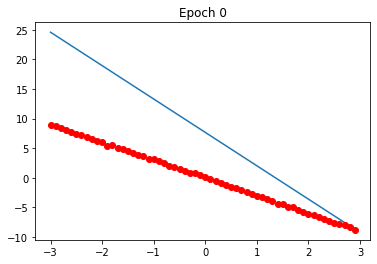

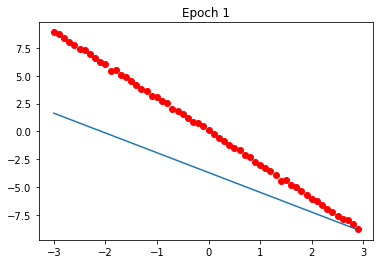

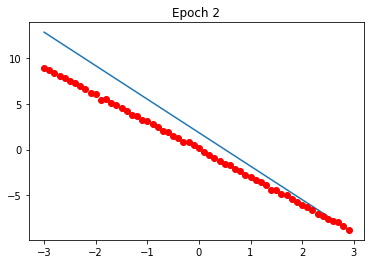

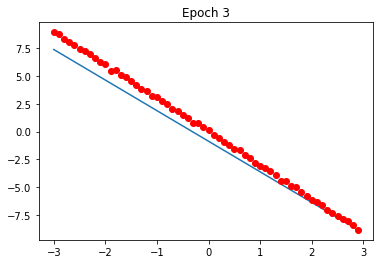

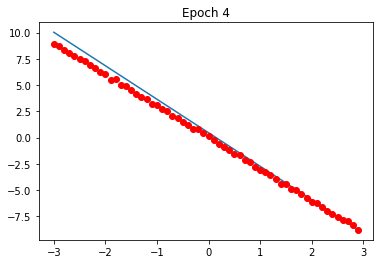

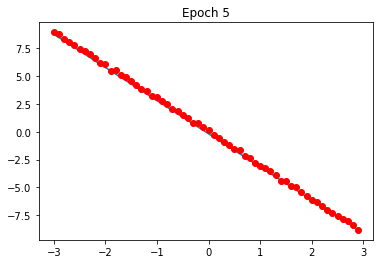

[Epoch 0] Total loss: 2554 
[Epoch 1] Total loss: 868 
[Epoch 2] Total loss: 183 
[Epoch 3] Total loss: 56 
[Epoch 4] Total loss: 8 
[Epoch 5] Total loss: 5 


In [3]:
def forward(x):
    y = w * x + b
    return y

# Cost function
def criterion(yhat, y):
    return torch.mean((yhat-y) ** 2)

lr = 0.1

COST = []

for epoch in range(6):
    total = 0
    
    for _x, _y in zip(x, y):
        _yhat = forward(_x)
        loss = criterion(_yhat, _y)
        loss.backward()
        
        w.data = w.data - lr * w.grad.data
        b.data = b.data - lr * b.grad.data
        
        w.grad.data.zero_()
        b.grad.data.zero_()
        
        total += loss.item()
    
    COST.append(total)
    
    yhat = forward(x)
        
    plt.title('Epoch %d' % epoch)
    plt.plot(x.numpy(), yhat.detach().numpy())
    plt.plot(x.numpy(), y.view(-1, 1).numpy(), 'ro')
    plt.show()

for ind, c in enumerate(COST):
    print('[Epoch %d] Total loss: %d ' % (ind, c));

## SGD using Dataloader

In [4]:
from torch.utils.data import Dataset, DataLoader

w = torch.tensor(-15.0, requires_grad=True)
b = torch.tensor(-10.0, requires_grad=True)

class Data(Dataset):
    def __init__(self):  
        self.x = torch.arange(-3, 3, 0.1).view(-1, 1)
        self.y = -3 * x + 1 + 0.1 * torch.randn(self.x.shape[0])
        self.len = self.x.shape[0]
        
    def __getitem__(self, index):
        return self.x[index], self.y[index]
    
    def __len__(self):
        return self.len

dataset = Data()
print(len(dataset))
_x, _y = dataset[0]
print(_x, _y)

60
tensor([-3.]) tensor([ 9.8796,  9.8572, 10.1553,  9.9704,  9.9903, 10.0190, 10.0207,  9.9114,
         9.8665, 10.0242, 10.1020, 10.0133, 10.0910, 10.1156, 10.0316,  9.8886,
         9.8101, 10.0219, 10.0752, 10.0936,  9.9842, 10.0157,  9.9554,  9.8912,
        10.0193, 10.0816, 10.0026, 10.0210,  9.9056, 10.0638,  9.9215,  9.8618,
         9.9912,  9.9644, 10.1823,  9.9740,  9.9395,  9.9006, 10.1402,  9.9007,
        10.0918,  9.9288,  9.9420,  9.7824,  9.9403, 10.0054,  9.9214,  9.9403,
         9.8096,  9.9161,  9.9072, 10.0116,  9.9129,  9.8656, 10.0799,  9.9681,
        10.1648, 10.0155, 10.1788,  9.8876])


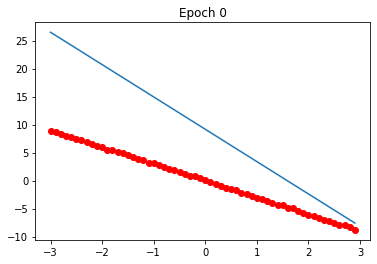

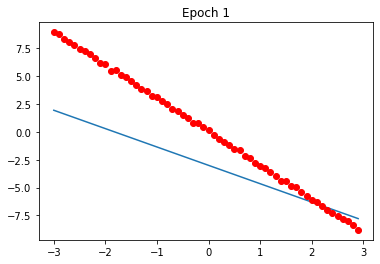

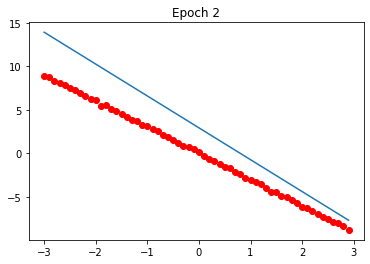

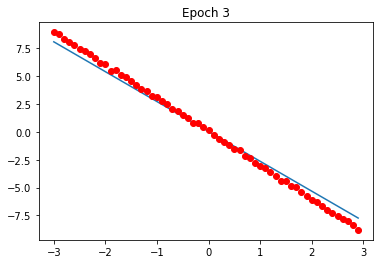

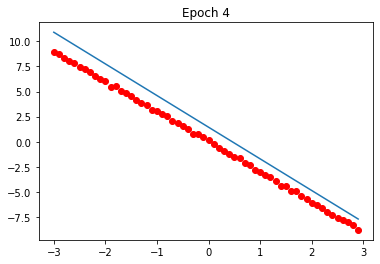

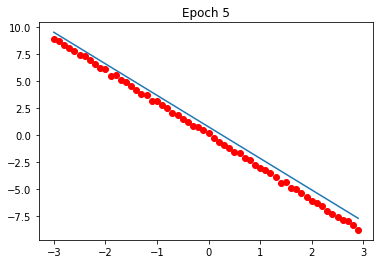

[Epoch 0] Total loss: 2410 
[Epoch 1] Total loss: 954 
[Epoch 2] Total loss: 227 
[Epoch 3] Total loss: 54 
[Epoch 4] Total loss: 13 
[Epoch 5] Total loss: 3 


In [5]:
train_loader = DataLoader(dataset=dataset, batch_size=1)

COST = []

for epoch in range(6):
    total = 0

    for _x, _y in train_loader:
        _yhat = forward(_x)
        loss = criterion(_yhat, _y)
        loss.backward()

        w.data = w.data - lr * w.grad.data
        b.data = b.data - lr * b.grad.data

        w.grad.data.zero_()
        b.grad.data.zero_()

        total += loss.item()
    
    COST.append(total)
    
    yhat = forward(x)
        
    plt.title('Epoch %d' % epoch)
    plt.plot(x.numpy(), yhat.detach().numpy())
    plt.plot(x.numpy(), y.view(-1, 1).numpy(), 'ro')
    plt.show()

for ind, c in enumerate(COST):
    print('[Epoch %d] Total loss: %d ' % (ind, c));
